In [61]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii
import pandas as pd
from scipy import interpolate
import warnings
from scipy.integrate import quad, IntegrationWarning
import scipy.integrate as integrate
from numpy import log10, exp
from astropy.constants import m_e, e ,c 
from astropy import units as u
from scipy.constants import physical_constants
from scipy.constants import physical_constants, c as cc

In [62]:
C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187  # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value  # cm/s
cc_k = c.to(u.km / u.s).value #km / s
v_th_CIV = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952



voigt_path = r'/home/jin/T_Cloudy/CIV_Voigt.txt'
name = ['lambda','sigma']
voigt_file = pd.read_csv(voigt_path,sep='\s+',names=name,)

lam, scat = voigt_file['lambda'].to_numpy() , voigt_file['sigma'].to_numpy()


del_V =  ((lam-C_IV_K) / C_IV_K) * cc /1e5


[3.7460435e-14] [2.66948315e+13]


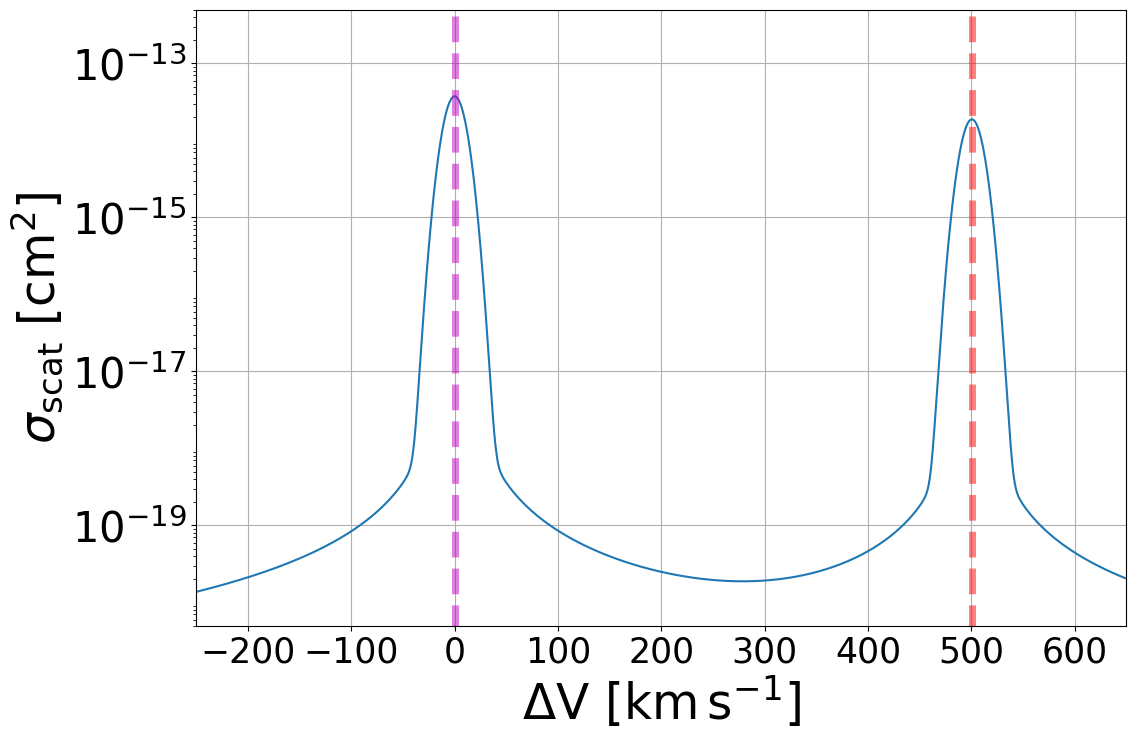

In [65]:
fig = plt.figure(1,figsize=(12,8))

plt.plot(del_V,scat)
plt.yscale('log')
plt.xlim(-250,650)
plt.ylim(0.5e-20,5e-13)
HH = (C_IV_H_A/ C_IV_K_A -1 ) *cc_k
plt.axvline(0,ymin=-1,ymax=1,linestyle='--',color='m',alpha=0.5,lw=5)
plt.axvline(HH,ymin=-1,ymax=1,linestyle='--',color='r',alpha=0.5,lw=5)
plt.ylabel(r'$\sigma_{\rm scat} ~ [\rm cm^{2}]$',fontsize=35)
plt.xlabel(r'$\Delta \rm V ~ [\rm km \, s^{-1}]$',fontsize=35)
plt.yticks([10e-20,10e-18,10e-16,10e-14],fontsize=30)
plt.xticks(fontsize=25)
# plt.savefig('/home/jin/바탕화면/Scattering cross_section.png',bbox_inches='tight')
# plt.axhline(y=1e-14,xmin=0,xmax=1,linestyle='--')
plt.grid(True)


dx= 0.05
ii = np.where( (del_V > 0-dx) & (del_V < 0+dx) )[0]
jj = np.where( (del_V > 500-dx) & (del_V < 500+dx) )[0]
print((scat[ii]) ,1/scat[ii])
# print(jj)